In [1]:
import numpy as np

np.version.full_version

'2.3.4'

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
mnist = tf.keras.datasets.mnist

(train_images, y_train), (x_test, y_test) = mnist.load_data()
train_images, x_test = train_images / 255.0, x_test /255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
img = train_images[0]
img.shape

(28, 28)

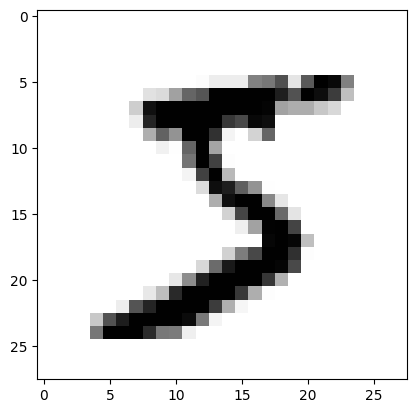

In [5]:
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

/Users/twinsant/GitHub/ML/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_images[:1].shape

(1, 28, 28)

In [9]:
predictions = model(train_images[:1]).numpy()
predictions

array([[ 0.00247724, -0.03108799,  0.2352571 ,  0.13912135,  0.03495613,
        -0.36197412, -0.01491104,  0.5875179 ,  0.06042727, -0.02286962]],
      dtype=float32)

In [10]:
p = tf.nn.softmax(predictions).numpy()
p

array([[0.09161229, 0.08858834, 0.1156242 , 0.10502617, 0.0946366 ,
        0.06363185, 0.09003308, 0.16444993, 0.09707807, 0.08931939]],
      dtype=float32)

In [11]:
p.sum()

np.float32(0.99999994)

In [12]:
p.argmax()

np.int64(7)

In [13]:
y_train[0]

np.uint8(5)

In [14]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [15]:
loss_fn(y_train[:1], predictions).numpy()

np.float32(2.754641)

In [16]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [17]:
model.fit(train_images, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.9125 - loss: 0.2970
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.9577 - loss: 0.1424
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.9670 - loss: 0.1061
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.9730 - loss: 0.0865
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 470us/step - accuracy: 0.9775 - loss: 0.0736
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.9797 - loss: 0.0650
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - accuracy: 0.9812 - loss: 0.0581
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - accuracy: 0.9831 - loss: 0.0518
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.9846 - loss: 0.0485
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step - accuracy: 0.9854 - loss: 0.0442


In [18]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - 371us/step - accuracy: 0.9790 - loss: 0.0719


[0.07192753255367279, 0.9789999723434448]

In [19]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [20]:
result = probability_model(x_test[:5])
result = result.numpy().argmax(axis=1)
print(y_test[:5])

[7 2 1 0 4]


In [21]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)